<font>Classify the Iris dataset using KNN and SVM models:<br>
1. Choose the best hperparameter 'K' in KNN classification using grid search<br>
2. Choose the best Kernel (Linear or RBF) for SVC and its coressponding Gamma and C parameters using grid search<br>
3. Compare the accuracy of KNN and SVC for their best hyperparameter values<br>
4. Compare the performance of KNN and SVC using Precision, Recall and F1 score for their best hyperparameter values</font>

In [1]:
from sklearn.datasets import load_iris 
iris = load_iris() 

In [2]:
data=iris.data
target=iris.target

In [22]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## SVC

In [27]:
svc = SVC(class_weight='balanced',random_state=0)
#lr = LogisticRegression(random_state=0)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,stratify=target,
                                                random_state=0)

model = svc
#model = lr

Xtrain.shape



from sklearn.grid_search import GridSearchCV
param_grid = {'max_depth': [1, 5, 7, 10],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
             'kernel':['rbf','linear','poly','sigmoid'],}
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid = GridSearchCV(model, param_grid,n_jobs=-1)
%time grid.fit(X_train, y_train)
print(grid.best_params_)



model = grid.best_estimator_
yfit = model.predict(X_test)
print("Accuracy=",model.score(X_test,y_test))



Wall time: 3.44 s
{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}
Accuracy= 1.0


[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


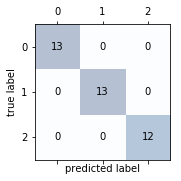

             precision    recall  f1-score   support

          0       0.46      0.46      0.46        13
          1       0.54      0.44      0.48        16
          2       0.33      0.44      0.38         9

avg / total       0.46      0.45      0.45        38



In [28]:
from sklearn.metrics import confusion_matrix 

y_pred = model.predict(X_test) 

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred) 
print(confmat) 
fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) 

for i in range(confmat.shape[0]): 
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label') 
plt.ylabel('true label') 
plt.show()
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

## KNN

In [30]:
#svc = SVC(class_weight='balanced',random_state=0)
#lr = LogisticRegression(random_state=0)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,stratify=target,
                                                random_state=0)

model = KNeighborsClassifier()
#model = lr

Xtrain.shape



from sklearn.grid_search import GridSearchCV
param_grid = {'n_neighbors': [1, 2,3,4,6, 5, 7,10,15,20]}
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid = GridSearchCV(model, param_grid,n_jobs=-1)
%time grid.fit(X_train, y_train)
print(grid.best_params_)



model = grid.best_estimator_
yfit = model.predict(X_test)
print("Accuracy=",model.score(X_test,y_test))



Wall time: 3 s
{'n_neighbors': 4}
Accuracy= 1.0


[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


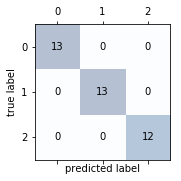

             precision    recall  f1-score   support

          0       0.46      0.46      0.46        13
          1       0.54      0.44      0.48        16
          2       0.33      0.44      0.38         9

avg / total       0.46      0.45      0.45        38



In [31]:
from sklearn.metrics import confusion_matrix 

y_pred = model.predict(X_test) 

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred) 
print(confmat) 
fig, ax = plt.subplots(figsize=(2.5, 2.5)) 
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3) 

for i in range(confmat.shape[0]): 
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label') 
plt.ylabel('true label') 
plt.show()
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

For KNN classifier we are getting best results for K=4. The accuracy is 100%
For SVM classifier we are getting best results for C=50, gamma=0.005 and kernel is 'rbf'.
Precision recall and f1-score are exactly same for both classifiers. After doing stratify target we removed class imbalance in splitting data which caused accuracy to go to 1 for both classifiers